# Random Forest Algorithm

A more advanced model, the random forest uses multiple decision trees to model and ensembles the mean prediction of all the trees. Each decision tree, individually, may be a weak-learner but the ensembled model taken together will be strong-learner.

In [1]:
import os
import numpy as np 
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [2]:

print(os.getcwd())
print("")

train = pd.read_csv("../data/train_after_feature_engineering.csv")
test = pd.read_csv("../data/test_after_feature_engineering.csv")

print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))    
print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))


/home/mcheruvu/notebook/code

The train data has 1460 rows and 307 columns
The test data has 1459 rows and 306 columns


In [3]:
np.random.seed(1234)

_random_forest_algo = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=123456)

# Fit the Model

In [4]:
target_vector = train["SalePrice"]
target_vector = np.log1p(target_vector) # log(SalePrice) + 1

train.drop(['SalePrice'], axis=1, inplace=True)


model = _random_forest_algo.fit(train, target_vector)    
    

# Feature Ranking

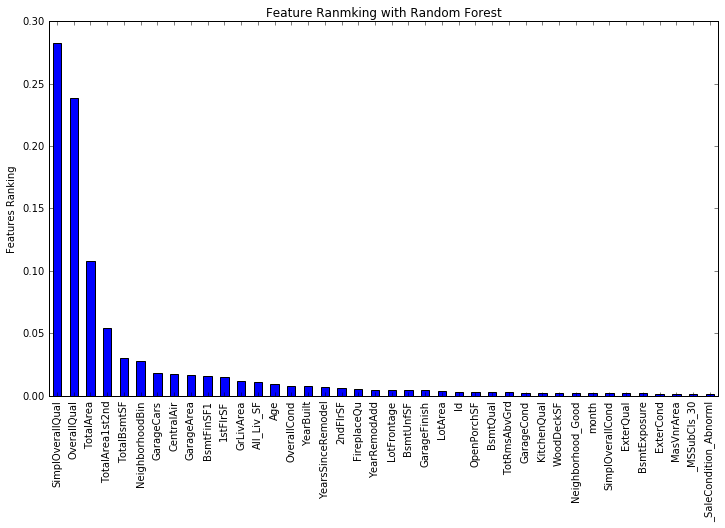

In [10]:
feat_imp = pd.Series(_random_forest_algo.feature_importances_, train.columns).sort_values(ascending=False)
feat_imp[:40].plot(kind='bar', title='Feature Ranmking with Random Forest', figsize=(12,8))
plt.ylabel('Feature Importance values')
plt.subplots_adjust(bottom=0.25)
plt.ylabel('Features Ranking')

plot = plt.gcf()
plot.savefig("../images/random_forest_feature_ranking.pdf", bbox_inches='tight')


# Predict the Test Sale Price

In [24]:
y_train = target_vector
y_train_pred = _random_forest_algo.predict(train)
    
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))

print("Random Forest score on training set: ", rmse_train)

y_test_pred = _random_forest_algo.predict(test)

print(y_test_pred[5:])

('Random Forest score on training set: ', 0.051904330445822787)
[ 12.12575038  12.01663116  12.08182459 ...,  11.94843802  11.67941795
  12.35900299]


# Save Predictions

In [25]:
df_predict = pd.DataFrame({'Id': test["Id"], 'SalePrice': np.exp(y_test_pred) - 1.0})
#df_predict = pd.DataFrame({'Id': id_vector, 'SalePrice': sale_price_vector})

df_predict.to_csv('../data/kaggle_python_random_forest.csv', header=True, index=False)

print("...file is saved")

...file is saved
